In [62]:
import numpy as np
import pandas as pd
import re
from datetime import datetime

In [63]:
f = open("WhatsApp Chat with Kanishka/WhatsApp Chat with Kanishka.txt",'r', encoding='utf-8')

In [64]:
data = f.read()

In [65]:
# Define pattern for timestamps
pattern = r"(\d{1,2}/\d{1,2}/\d{4}), (\d{1,2}:\d{2}) - (.+)"

In [66]:
# data_lines = data.split("\n")  # Split by lines
# print("Total lines in file:", len(data_lines))


In [67]:
# Extract all matches
matches = re.findall(pattern, data)

In [68]:
# Lists to store extracted data
datetimes = []
users = []
messages = []


for match in matches:
    date_part, time_part, msg = match  # Unpacking the tuple
    
    # Split user and message
    split_msg = msg.split(": ", 1)  # Splitting on first ': ' to separate user and message
    if len(split_msg) == 2:
        user, message = split_msg
    else:
        user = "Unknown"  # Handle system messages
        message = split_msg[0]

    #  **Filter out system messages**
    if "Messages and calls are end-to-end encrypted" in message:
        continue  # Skip encryption messages

    # Correct datetime conversion
    formatted_datetime = datetime.strptime(f"{date_part} {time_part}", "%d/%m/%Y %H:%M")

    # Append to lists
    datetimes.append(formatted_datetime)
    users.append(user)
    messages.append(message)


In [69]:
chat_df = pd.DataFrame({
    "datetime": datetimes,  
    "user": users,          
    "message": messages     
})


In [70]:
print(chat_df.head(10))  


             datetime      user  \
0 2024-04-27 19:30:00   Unknown   
1 2024-04-27 19:30:00  Kanishka   
2 2024-04-27 19:30:00  Kanishka   
3 2024-04-27 19:30:00         .   
4 2024-04-27 19:31:00         .   
5 2024-04-27 19:31:00  Kanishka   
6 2024-04-27 19:33:00  Kanishka   
7 2024-04-27 19:33:00  Kanishka   
8 2024-04-27 19:36:00         .   
9 2024-04-27 19:36:00  Kanishka   

                                             message  
0                              Kanishka is a contact  
1  Maine vo img delete krdi thi phn se send it again  
2                  Talking about this jispe tag kiya  
3                                               ruko  
4                                    <Media omitted>  
5                                       Ok dekhti hu  
6                     Poora question sirf yehi h kya  
7                                      No statement?  
8                                      ruko bhej rha  
9                                                okk  


In [71]:
chat_df.head()

,datetime,user,message
0,2024-04-27 19:30:00,Unknown,Kanishka is a contact
1,2024-04-27 19:30:00,Kanishka,Maine vo img delete krdi thi phn se send it again
2,2024-04-27 19:30:00,Kanishka,Talking about this jispe tag kiya
3,2024-04-27 19:30:00,.,ruko
4,2024-04-27 19:31:00,.,<Media omitted>


In [72]:
chat_df['user'] = chat_df['user'].replace('.', 'PK')


In [73]:
chat_df.head(10)

,datetime,user,message
0,2024-04-27 19:30:00,Unknown,Kanishka is a contact
1,2024-04-27 19:30:00,Kanishka,Maine vo img delete krdi thi phn se send it again
2,2024-04-27 19:30:00,Kanishka,Talking about this jispe tag kiya
3,2024-04-27 19:30:00,PK,ruko
4,2024-04-27 19:31:00,PK,<Media omitted>
5,2024-04-27 19:31:00,Kanishka,Ok dekhti hu
6,2024-04-27 19:33:00,Kanishka,Poora question sirf yehi h kya
7,2024-04-27 19:33:00,Kanishka,No statement?
8,2024-04-27 19:36:00,PK,ruko bhej rha
9,2024-04-27 19:36:00,Kanishka,okk


In [74]:
chat_df.shape

(37964, 3)

In [75]:
chat_df['year'] = chat_df['datetime'].dt.year

In [76]:
chat_df['month'] = chat_df['datetime'].dt.month_name()

In [77]:
chat_df['day'] = chat_df['datetime'].dt.day

In [78]:
chat_df['hours'] = chat_df['datetime'].dt.hour

In [79]:
chat_df['minute'] = chat_df['datetime'].dt.minute

In [80]:
chat_df.head(20)

,datetime,user,message,year,month,day,hours,minute
0,2024-04-27 19:30:00,Unknown,Kanishka is a contact,2024,April,27,19,30
1,2024-04-27 19:30:00,Kanishka,Maine vo img delete krdi thi phn se send it again,2024,April,27,19,30
2,2024-04-27 19:30:00,Kanishka,Talking about this jispe tag kiya,2024,April,27,19,30
3,2024-04-27 19:30:00,PK,ruko,2024,April,27,19,30
4,2024-04-27 19:31:00,PK,<Media omitted>,2024,April,27,19,31
5,2024-04-27 19:31:00,Kanishka,Ok dekhti hu,2024,April,27,19,31
6,2024-04-27 19:33:00,Kanishka,Poora question sirf yehi h kya,2024,April,27,19,33
7,2024-04-27 19:33:00,Kanishka,No statement?,2024,April,27,19,33
8,2024-04-27 19:36:00,PK,ruko bhej rha,2024,April,27,19,36
9,2024-04-27 19:36:00,Kanishka,okk,2024,April,27,19,36


In [81]:
from urlextract import URLExtract
extractor = URLExtract()
links = []

for message in chat_df['message']:
    links.extend(extractor.find_urls(message))


In [82]:
# !pip install urlextract

In [83]:
links

['https://www.youtube.com/watch?v=m5iGcEWi8L4',
 'https://seek.onlinedegree.iitm.ac.in/courses/ns_24t2_cs2008p?id=9&type=lesson&tab=courses&unitId=5',
 'that.In',
 'https://youtu.be/iw0WcBNUtro?feature=shared',
 'https://github.com/sachin3098/MLP-project-Last-term/blob/main/Code/colab%20notebook.ipynb',
 'https://colab.research.google.com/drive/1VHcPMg9RaAAFKJewxZ16NSm41iwDvFWV?usp=drive_link',
 'https://colab.research.google.com/drive/1n9w2hlEAy3EcdJjMQd_DB4ngCZPI9x3P?usp=drive_link',
 'https://www.kaggle.com/code/mmanasdora/21f1000406-notebook-t22024',
 'https://docs.google.com/spreadsheets/d/e/2PACX-1vRF2AO6l_B1jI0bKx1qRMMzi9mFnM8uYkb3LIt0urvTQ6iUweEmkXwAzAKJGvXCcLoQ8XXTgPnFoT0L/pubhtml?gid=0&single=true',
 'https://docs.google.com/spreadsheets/u/0/d/e/2PACX-1vTCy8keGv4ZmIw1KzODkqu0gEyBBZVMh6TI3T80ymnaexAg8C7_775Cg0fggFDuPODvfZpLiOBnFIYw/pubhtml?gid=0&single=true',
 'https://mlp-viva-workflow-z5snvc5h3q-el.a.run.app/student/',
 'https://docs.google.com/spreadsheets/d/1TpmHPHDkyTSjIH

In [84]:
len(links)

99

In [85]:
x = chat_df['user'].value_counts().head()

In [86]:
 import matplotlib.pyplot as plt

In [87]:
name = x.index
count = x.values

<BarContainer object of 3 artists>

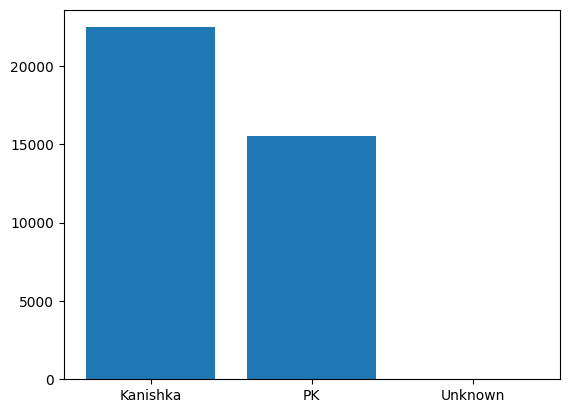

In [88]:
 plt.bar(name,count)

In [89]:
chat_df.head()

,datetime,user,message,year,month,day,hours,minute
0,2024-04-27 19:30:00,Unknown,Kanishka is a contact,2024,April,27,19,30
1,2024-04-27 19:30:00,Kanishka,Maine vo img delete krdi thi phn se send it again,2024,April,27,19,30
2,2024-04-27 19:30:00,Kanishka,Talking about this jispe tag kiya,2024,April,27,19,30
3,2024-04-27 19:30:00,PK,ruko,2024,April,27,19,30
4,2024-04-27 19:31:00,PK,<Media omitted>,2024,April,27,19,31


In [90]:
round((chat_df['user'].value_counts()/chat_df.shape[0])*100,2).reset_index().rename(columns={'count': 'percent' , 'user': 'name'})

,name,percent
0,Kanishka,59.17
1,PK,40.83
2,Unknown,0.01


In [91]:
new_df = chat_df[chat_df['message'] != '<Media omitted>']

In [92]:
words = []
for message in new_df['message']:
    words.extend(message.split())

In [93]:
# !pip install collection 


In [94]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(40))

,0,1
0,h,7776
1,to,3723
2,me,3717
3,nhi,2496
4,hi,1950
5,hu,1810
6,ki,1774
7,bhi,1758
8,se,1606
9,kya,1512


In [95]:
# !pip install emoji

In [96]:
import emoji

emojis = []
for message in new_df['message']:
    emojis.extend([c for c in message if emoji.is_emoji(c)])


In [97]:
pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

,0,1
0,😂,6072
1,🤣,1375
2,💀,1135
3,🥲,736
4,🥹,332
...,...,...
190,🎅,1
191,💛,1
192,🍵,1
193,📜,1


In [98]:
emojis

['😬',
 '💀',
 '😂',
 '🥲',
 '🫥',
 '💀',
 '😂',
 '😂',
 '🥲',
 '🤔',
 '😂',
 '🫥',
 '💀',
 '😂',
 '🥲',
 '😂',
 '😂',
 '😂',
 '😂',
 '🥲',
 '🥲',
 '😂',
 '😂',
 '😂',
 '🫥',
 '😂',
 '💀',
 '🥲',
 '🥲',
 '😂',
 '💀',
 '😂',
 '🥲',
 '🫶',
 '🏻',
 '💀',
 '😂',
 '😂',
 '😂',
 '😂',
 '🤓',
 '😂',
 '😂',
 '😂',
 '🥲',
 '🙉',
 '🎉',
 '😂',
 '💀',
 '😂',
 '🙂',
 '↔',
 '👌',
 '👌',
 '🫶',
 '💀',
 '🥹',
 '🥲',
 '😂',
 '🥹',
 '😂',
 '😂',
 '🙃',
 '😃',
 '🙃',
 '😀',
 '👏',
 '🏼',
 '👏',
 '🏼',
 '😁',
 '😂',
 '☠',
 '🫡',
 '😂',
 '😬',
 '💀',
 '💀',
 '🫠',
 '😶',
 '🙄',
 '😂',
 '😐',
 '😊',
 '😁',
 '😬',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '🫥',
 '🥹',
 '🥲',
 '🥲',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '💀',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '👏',
 '🏼',
 '😅',
 '😁',
 '🥲',
 '🤡',
 '😁',
 '💀',
 '🥲',
 '😂',
 '😁',
 '🫠',
 '🙏',
 '🏼',
 '😂',
 '🧐',
 '😂',
 '😂',
 '💀',
 '🥶',
 '😂',
 '😂',
 '🫣',
 '😈',
 '🥲',
 '😂',
 '😂',
 '🤦',
 '🏻',
 '♀',
 '🤦',
 '🏻',
 '♀',
 '😂',
 '😂',
 '😂',
 '😮',
 '💨',
 '💀',
 '😭',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😭',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '🤡',
 '🤡',
 '😂',
 '🤣',
 '😈',
 '💀'

In [99]:
print(chat_df.columns)


Index(['datetime', 'user', 'message', 'year', 'month', 'day', 'hours',
       'minute'],
      dtype='object')


In [100]:
chat_df['month_num'] = chat_df['datetime'].dt.month

In [101]:
timeline = chat_df.groupby(['year','month_num','month']).count()['message'].reset_index()

In [102]:
timeline

,year,month_num,month,message
0,2024,4,April,243
1,2024,5,May,241
2,2024,6,June,888
3,2024,7,July,3955
4,2024,8,August,9107
5,2024,9,September,6258
6,2024,10,October,8169
7,2024,11,November,3549
8,2024,12,December,3932
9,2025,1,January,1622


In [106]:
time = []
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i] + '-' + str(timeline['year'][i]))
    

In [107]:
timeline['time'] = time

In [108]:
timeline

,year,month_num,month,message,time
0,2024,4,April,243,April-2024
1,2024,5,May,241,May-2024
2,2024,6,June,888,June-2024
3,2024,7,July,3955,July-2024
4,2024,8,August,9107,August-2024
5,2024,9,September,6258,September-2024
6,2024,10,October,8169,October-2024
7,2024,11,November,3549,November-2024
8,2024,12,December,3932,December-2024
9,2025,1,January,1622,January-2025


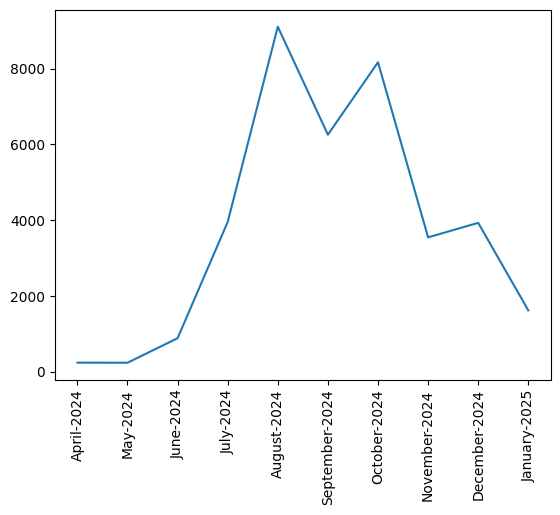

In [112]:
plt.plot(timeline['time'],timeline['message'])
plt.xticks(rotation='vertical')
plt.show()

In [115]:
chat_df['message_in_a_day'] = chat_df['datetime'].dt.date

In [116]:
daily_timeline = chat_df.groupby('message_in_a_day').count()['message'].reset_index()

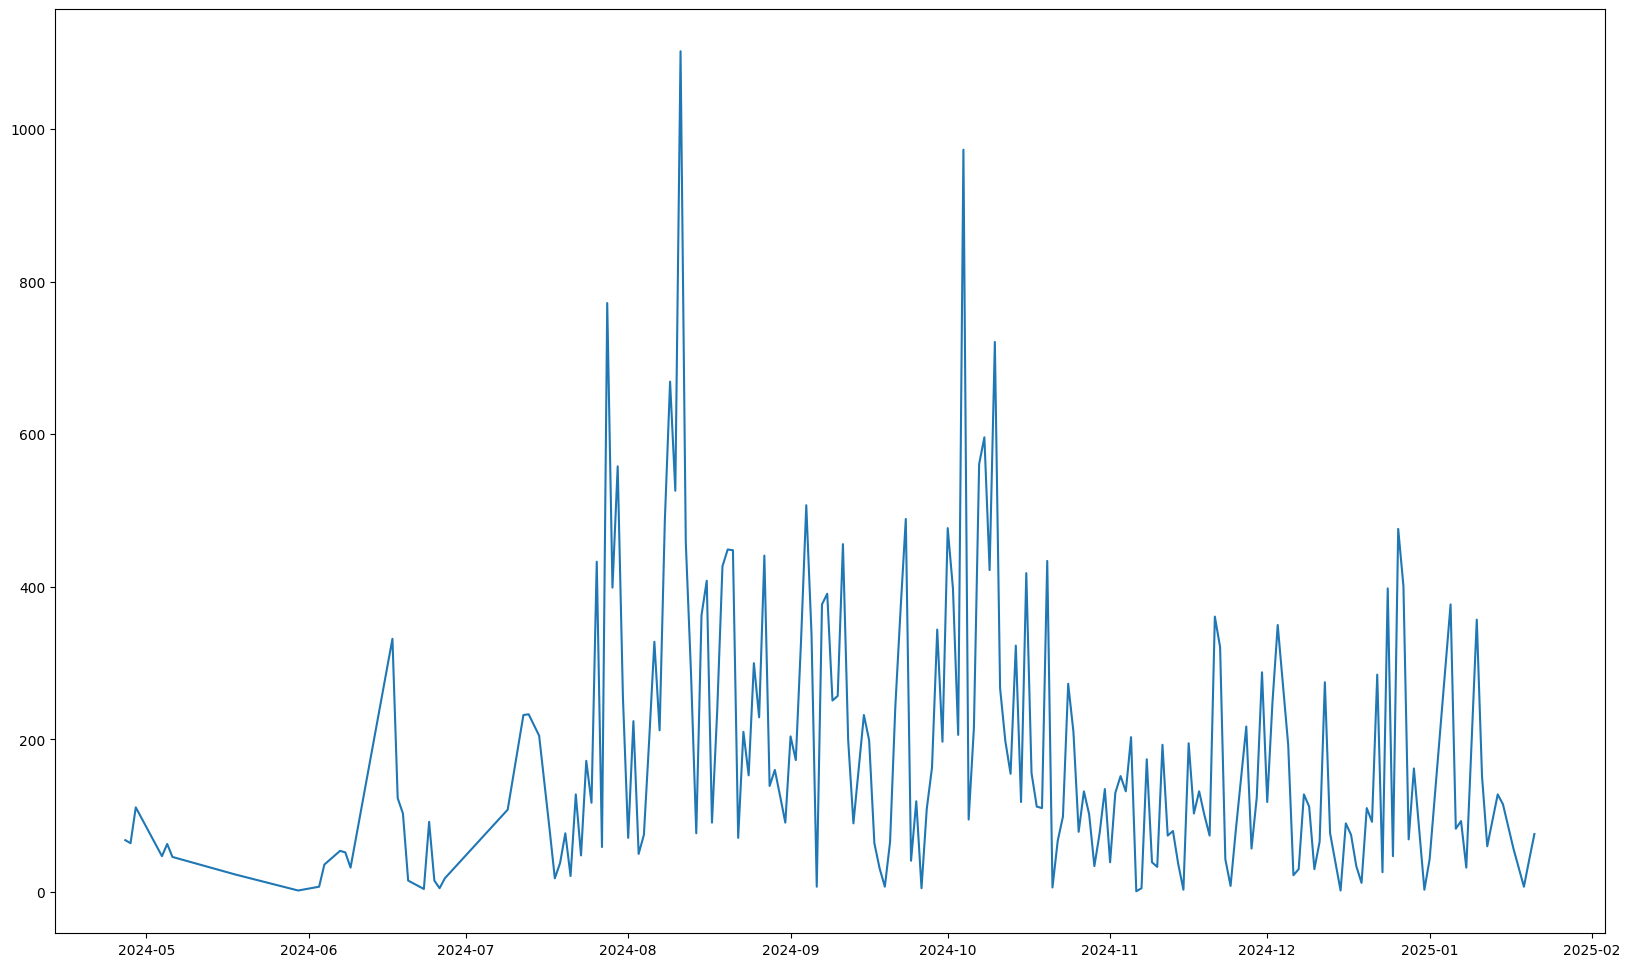

In [119]:
plt.figure(figsize=(20,12))
plt.plot(daily_timeline['message_in_a_day'],daily_timeline['message'])

In [120]:
chat_df.head()

,datetime,user,message,year,month,day,hours,minute,month_num,message_in_a_day
0,2024-04-27 19:30:00,Unknown,Kanishka is a contact,2024,April,27,19,30,4,2024-04-27
1,2024-04-27 19:30:00,Kanishka,Maine vo img delete krdi thi phn se send it again,2024,April,27,19,30,4,2024-04-27
2,2024-04-27 19:30:00,Kanishka,Talking about this jispe tag kiya,2024,April,27,19,30,4,2024-04-27
3,2024-04-27 19:30:00,PK,ruko,2024,April,27,19,30,4,2024-04-27
4,2024-04-27 19:31:00,PK,<Media omitted>,2024,April,27,19,31,4,2024-04-27


In [122]:
chat_df['day_name'] = chat_df['datetime'].dt.day_name()

In [124]:
chat_df['day_name'].value_counts()

day_name
Sunday       6583
Monday       6073
Tuesday      6055
Friday       5973
Thursday     4778
Wednesday    4729
Saturday     3773
Name: count, dtype: int64

In [125]:
chat_df['month'].value_counts()

month
August       9107
October      8169
September    6258
July         3955
December     3932
November     3549
January      1622
June          888
April         243
May           241
Name: count, dtype: int64

In [127]:
period = []
for hour in chat_df[['day_name', 'hours']]['hours']:
    if hour == 23:
        period.append(str(hour) + "-" + str('00'))
    elif hour == 0:
        period.append(str('00') + "-" + str(hour + 1))
    else:
        period.append(str(hour) + "-" + str(hour + 1))

chat_df['period'] = period

In [128]:
chat_df.head()

,datetime,user,message,year,month,day,hours,minute,month_num,message_in_a_day,day_name,period
0,2024-04-27 19:30:00,Unknown,Kanishka is a contact,2024,April,27,19,30,4,2024-04-27,Saturday,19-20
1,2024-04-27 19:30:00,Kanishka,Maine vo img delete krdi thi phn se send it again,2024,April,27,19,30,4,2024-04-27,Saturday,19-20
2,2024-04-27 19:30:00,Kanishka,Talking about this jispe tag kiya,2024,April,27,19,30,4,2024-04-27,Saturday,19-20
3,2024-04-27 19:30:00,PK,ruko,2024,April,27,19,30,4,2024-04-27,Saturday,19-20
4,2024-04-27 19:31:00,PK,<Media omitted>,2024,April,27,19,31,4,2024-04-27,Saturday,19-20


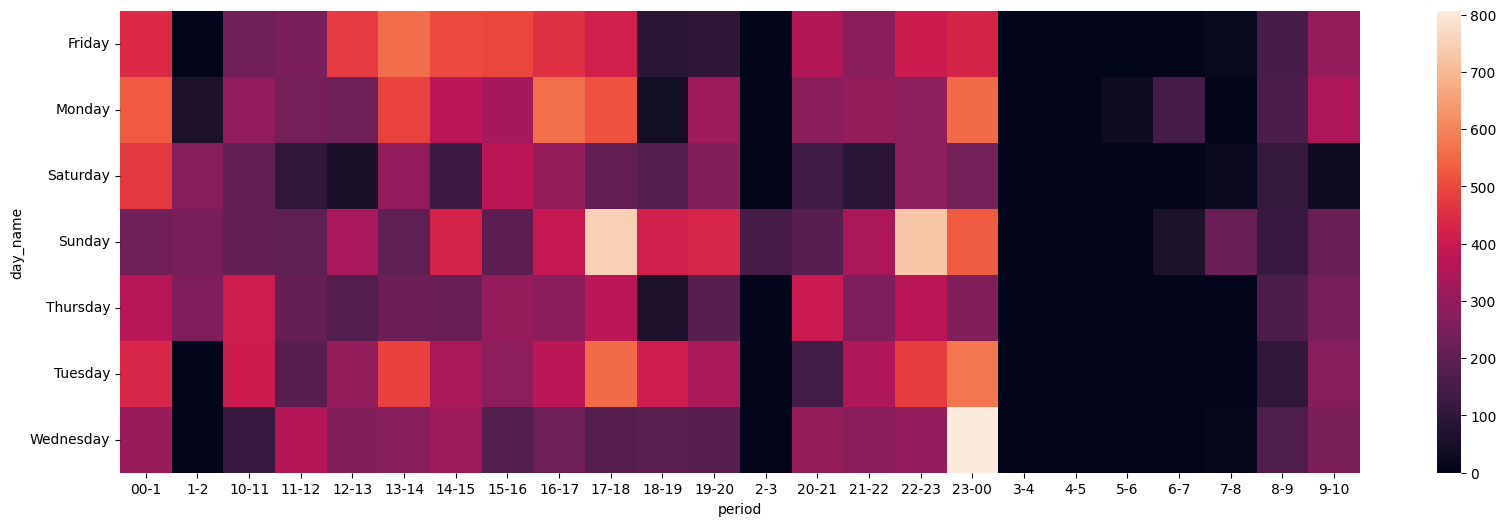

In [131]:
import seaborn as sns
plt.figure(figsize=(20,6))
sns.heatmap(chat_df.pivot_table(index='day_name',columns='period', values='message', aggfunc= 'count').fillna(0))
plt.yticks(rotation='horizontal')
plt.show()
            

In [132]:
chat_df.pivot_table(index='day_name',columns='period', values='message', aggfunc= 'count').fillna(0)

period,00-1,1-2,10-11,11-12,12-13,13-14,14-15,15-16,16-17,17-18,...,21-22,22-23,23-00,3-4,4-5,5-6,6-7,7-8,8-9,9-10
day_name,,,,,,,,,,,,,,,,,,,,,
Friday,444.0,1.0,236.0,250.0,477.0,561.0,502.0,495.0,456.0,420.0,...,279.0,404.0,429.0,0.0,0.0,1.0,0.0,17.0,153.0,300.0
Monday,527.0,62.0,295.0,241.0,225.0,491.0,375.0,329.0,563.0,514.0,...,298.0,288.0,552.0,0.0,0.0,26.0,146.0,1.0,158.0,346.0
Saturday,470.0,273.0,203.0,107.0,55.0,294.0,127.0,372.0,301.0,205.0,...,87.0,289.0,239.0,0.0,1.0,1.0,2.0,25.0,111.0,34.0
Sunday,233.0,246.0,205.0,196.0,336.0,200.0,428.0,195.0,394.0,750.0,...,343.0,728.0,530.0,0.0,0.0,0.0,57.0,220.0,117.0,215.0
Thursday,366.0,261.0,409.0,212.0,174.0,222.0,216.0,302.0,282.0,373.0,...,257.0,370.0,267.0,0.0,0.0,0.0,3.0,2.0,163.0,247.0
Tuesday,436.0,0.0,406.0,189.0,298.0,486.0,340.0,289.0,372.0,555.0,...,350.0,480.0,574.0,0.0,0.0,0.0,0.0,6.0,107.0,272.0
Wednesday,312.0,2.0,122.0,358.0,267.0,273.0,319.0,172.0,226.0,182.0,...,278.0,295.0,807.0,1.0,0.0,0.0,3.0,12.0,165.0,255.0
